In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [24]:
test = pd.read_csv("test_data.csv")
train = pd.read_csv("train_data.csv")


x_train = train.drop("label" , axis=1).values
x_test = test.drop("label",axis =1).values

In [25]:
shape = x_train.shape[1]

In [26]:
x_train = x_train.reshape((-1 , shape))
x_test = x_test.reshape((-1 , shape))

In [27]:
x_train = x_train/255.0
x_test = x_test/255.0

In [41]:
y_train = train['label'].values
y_test = test['label'].values

In [42]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [43]:
y_train.shape

(50000, 10)

In [44]:
#build model

model = Sequential(
    [

        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(10, activation = 'softmax')
    ]
)

In [45]:
model.compile(
    optimizer = SGD(learning_rate = 0.01),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [47]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10,validation_data = (x_test , y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.4527 - loss: 1.5497 - val_accuracy: 0.4538 - val_loss: 1.5434
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4606 - loss: 1.5331 - val_accuracy: 0.4566 - val_loss: 1.5244
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.4658 - loss: 1.5072 - val_accuracy: 0.4446 - val_loss: 1.5724
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.4739 - loss: 1.4969 - val_accuracy: 0.4604 - val_loss: 1.5126
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4724 - loss: 1.4910 - val_accuracy: 0.4613 - val_loss: 1.5180
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4782 - loss: 1.4632 - val_accuracy: 0.4624 - val_loss: 1.5165
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4838 - loss: 1.4598 - val_accuracy: 0.4684 - val_loss: 1.5015
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.4860 - loss: 1.4456 - val_accur

In [48]:
#model loss and accuracy

test_loss , test_acc = model.evaluate(x_test , y_test)
print("loss == ", test_loss)
print("accuracy == ",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4728 - loss: 1.4820
loss ==  1.487382411956787
accuracy ==  0.46959999203681946


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
actual:  8
predicted:  8


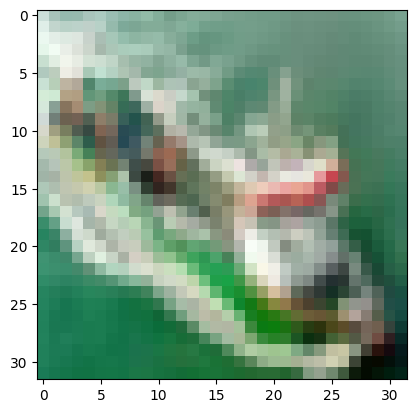

In [60]:
n = 15
plt.imshow(x_test[n].reshape((32,32,3)))

predictions = model.predict(x_test)

print("actual: ", np.argmax(y_test[n]))
print("predicted: ", np.argmax(predictions[n]))

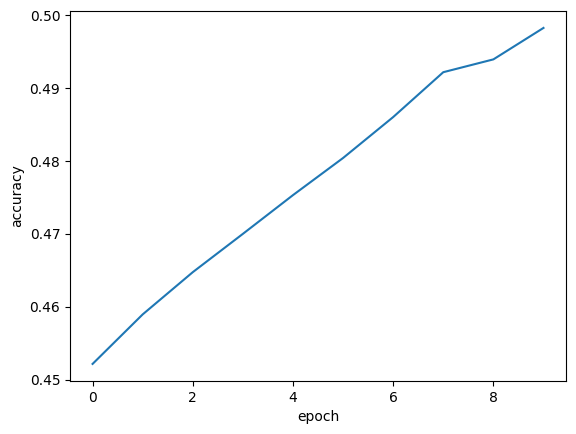

In [66]:

# plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

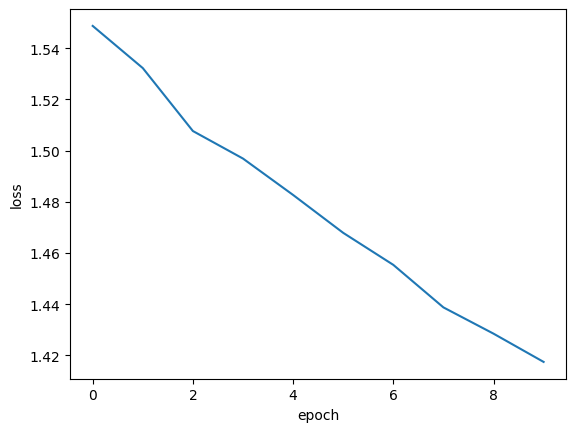

In [67]:
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [69]:
from sklearn.metrics import classification_report
y_test = np.argmax(y_test , axis =1)
predictions = np.argmax(predictions , axis=1)
csr = classification_report(y_test , predictions)
print(csr)

              precision    recall  f1-score   support

           0       0.57      0.54      0.55      1000
           1       0.54      0.65      0.59      1000
           2       0.46      0.21      0.29      1000
           3       0.35      0.24      0.29      1000
           4       0.52      0.27      0.35      1000
           5       0.40      0.40      0.40      1000
           6       0.40      0.71      0.51      1000
           7       0.54      0.50      0.52      1000
           8       0.69      0.49      0.58      1000
           9       0.38      0.69      0.49      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000

